In [21]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [22]:
#indicoio.config.api_key = 'd48be9a31ea9c241d883569acf6fd456'
indicoio.config.api_key = 'dd2ccc617162179d9b29a3148b0377de'



In [23]:
with open('parkland.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [24]:
count = 0
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    

Number of comments in our dataset
50500


In [25]:

    
extractor = URLExtract()

timestamp = []
body_text = []


num = 0
for x in data['comments']:
    num += 1
    
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]','',input_str)   # removes punctuation
    input_str = input_str.replace('\n','')        # removes '/n'
    

    
    if( 'timestamp' in data['comments'][x] and input_str):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])



        
    




In [26]:
len(body_text)


50325

In [27]:
# Parsed the timestamp to create a list of datatime objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    


In [28]:
print(len(time))

50325


In [29]:
political1 = indicoio.political(body_text[0:10000])
political2 = indicoio.political(body_text[10000:20000])
political3 = indicoio.political(body_text[20000:30000])
political4 = indicoio.political(body_text[30000:40000])
political5 = indicoio.political(body_text[40000:50000])
political6 = indicoio.political(body_text[50000:50325])

                                
                                
political = political1 + political2 + political3 + political4 + political5 + political6

In [30]:
len(political)



50325

In [31]:
sentiment1 = indicoio.sentiment(body_text[0:10000])
sentiment2 = indicoio.sentiment(body_text[10000:20000])
sentiment3 = indicoio.sentiment(body_text[20000:30000])
sentiment4 = indicoio.sentiment(body_text[30000:40000])
sentiment5 = indicoio.sentiment(body_text[40000:50000])
sentiment6 = indicoio.sentiment(body_text[50000:50325])

                                
                                
sentiment = sentiment1 + sentiment2 + sentiment3 + sentiment4 + sentiment5 + sentiment6

In [32]:
libertarian = []
liberal = []
conservative = []
green = []


for x in political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])

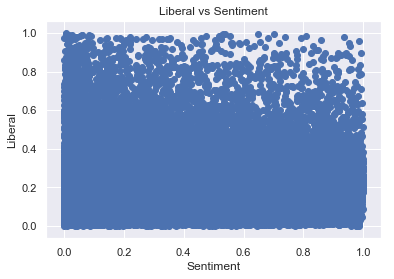

In [33]:
plt.scatter(sentiment, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




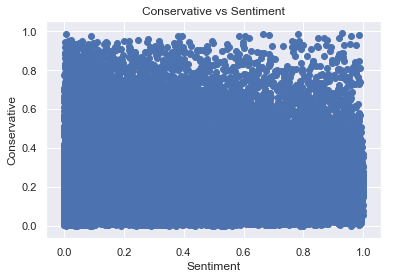

In [34]:
plt.scatter(sentiment, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


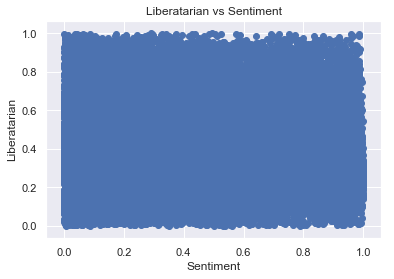

In [35]:
plt.scatter(sentiment, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


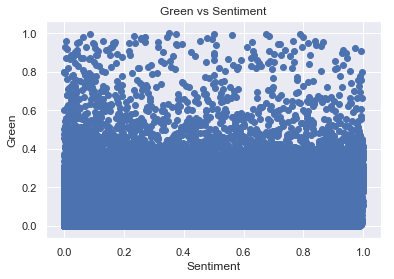

In [36]:
plt.scatter(sentiment, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


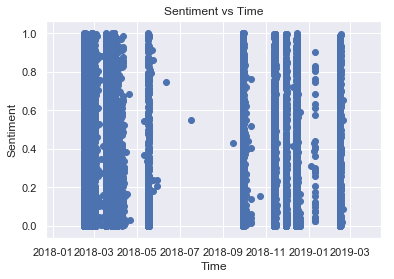

In [38]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

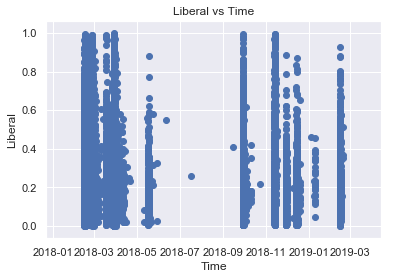

In [39]:
plt.scatter(time, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

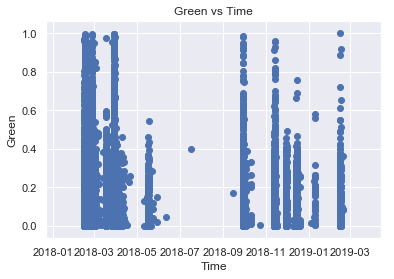

In [40]:
plt.scatter(time, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

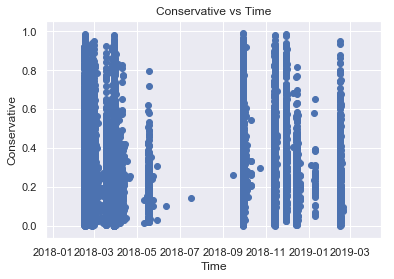

In [41]:
plt.scatter(time, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

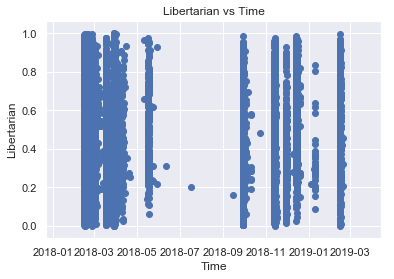

In [42]:
plt.scatter(time, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')

plt.show()

In [80]:
x = {'Sentiment':sentiment,'Time':time}

import pandas as pd
df = pd.DataFrame(x)



In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='numank', api_key='E5NjgyAxT2azZXX97hnk')

In [61]:
# Sentiment VS Time

traceSentimentTime = go.Scatter(
    x = time,
    y = sentiment,
    mode = 'markers'
)

sentimentVStime = [traceSentimentTime]
py.iplot(sentimentVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [68]:
# Conservative VS Time

traceConservativeTime = go.Scatter(
    x = time,
    y = conservative,
    mode = 'markers'
)

conservativeVStime = [traceConservativeTime]
py.iplot(conservativeVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [69]:
# Green VS Time

traceGreenTime = go.Scatter(
    x = time,
    y = green,
    mode = 'markers'
)

greenVStime = [traceGreenTime]
py.iplot(greenVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [70]:
# Liberal VS Time

traceLiberalTime = go.Scatter(
    x = time,
    y = liberal,
    mode = 'markers'
)

liberalVStime = [traceLiberalTime]
py.iplot(liberalVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [74]:
# Libertarian VS Time

traceLibertarianTime = go.Scatter(
    x = time,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]
py.iplot(libertarianVSsentiment, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [72]:
# Liberatarian VS Sentiment

traceLibertarianTime = go.Scatter(
    x = sentiment,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]

# Plot and embed in ipython notebook!
py.iplot(libertarianVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [67]:
# Conservative VS Sentiment

traceSentimentConservative = go.Scatter(
    x = sentiment,
    y = conservative,
    mode = 'markers'
)

conservativeVSsentiment = [traceSentimentConservative]

# Plot and embed in ipython notebook!
py.iplot(conservativeVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [78]:
# Liberal VS Sentiment

traceSentimentLiberal = go.Scatter(
    x = sentiment,
    y = liberal,
    mode = 'markers'
)

liberalVSsentiment = [traceSentimentLiberal]

# Plot and embed in ipython notebook!
py.iplot(liberalVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [79]:
# Green VS Sentiment

traceSentimentGreen = go.Scatter(
    x = sentiment,
    y = green,
    mode = 'markers'
)

greenVSsentiment = [traceSentimentGreen]

# Plot and embed in ipython notebook!
py.iplot(greenVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'
